### Import necessary libraries & Data


In [133]:
import pandas as pd
import numpy as np
from pathlib import Path

In [107]:
file_path = Path("__file__").parent / "telco-customer-churn.csv"
df = pd.read_csv(file_path)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Initial Data Exploration & Cleaning

In [108]:
# We need to convert columns into boolean values
# Note that TotalCharges is currently an object, it should be a string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [109]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [110]:
# Convert columns to binary and create new lowercase columns
df['gender_male'] = (df.gender=='Male')
df['senior_citizen'] = (df.SeniorCitizen==1)
df['partner'] = (df.Partner=='Yes')
df['dependents'] = (df.Dependents=='Yes')
df['phone_service'] = (df.PhoneService=='Yes')
df['multiple_lines'] = (df.MultipleLines=='Yes')
df['single_line'] = (df.MultipleLines=='No')

df['fiber_optic'] = (df.InternetService=='Fiber optic')
df['dsl'] = (df.InternetService=='DSL')

df['online_security'] = (df.OnlineSecurity=='Yes')
df['online_backup'] = (df.OnlineBackup=='Yes')
df['device_protection'] = (df.DeviceProtection=='Yes')
df['tech_support'] = (df.TechSupport=='Yes')
df['streaming_tv'] = (df.StreamingTV=='Yes')
df['streaming_movies'] = (df.StreamingMovies=='Yes')

df['month_to_month'] = (df.Contract=='Month-to-month')
df['one_year'] = (df.Contract=='One year')
df['two_year'] = (df.Contract=='Two year')

df['paperless_billing'] = (df.PaperlessBilling=='Yes')
df['electronic_check'] = (df.PaymentMethod=='Electronic check')
df['mailed_check'] = (df.PaymentMethod=='Mailed check')
df['bank_transfer'] = (df.PaymentMethod=='Bank transfer (automatic)')
df['credit_card'] = (df.PaymentMethod=='Credit card (automatic)')

df["total_charges"] = pd.to_numeric(df.TotalCharges, errors='coerce').fillna(0)
df['monthly_charges'] = df.MonthlyCharges
df['tenure'] = df.tenure

df['churn'] = (df.Churn=='Yes')

# Drop all original columns
columns_to_drop = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                  'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                  'TotalCharges', 'MonthlyCharges', 'Churn']

df.drop(columns=columns_to_drop, inplace=True)




In [111]:
df.head()

,tenure,gender_male,senior_citizen,partner,dependents,phone_service,multiple_lines,single_line,fiber_optic,dsl,...,one_year,two_year,paperless_billing,electronic_check,mailed_check,bank_transfer,credit_card,total_charges,monthly_charges,churn
0,1,False,False,True,False,False,False,False,False,True,...,False,False,True,True,False,False,False,29.85,29.85,False
1,34,True,False,False,False,True,False,True,False,True,...,True,False,False,False,True,False,False,1889.50,56.95,False
2,2,True,False,False,False,True,False,True,False,True,...,False,False,True,False,True,False,False,108.15,53.85,True
3,45,True,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,1840.75,42.30,False
4,2,False,False,False,False,True,False,True,True,False,...,False,False,True,True,False,False,False,151.65,70.70,True


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   int64  
 1   gender_male        7043 non-null   bool   
 2   senior_citizen     7043 non-null   bool   
 3   partner            7043 non-null   bool   
 4   dependents         7043 non-null   bool   
 5   phone_service      7043 non-null   bool   
 6   multiple_lines     7043 non-null   bool   
 7   single_line        7043 non-null   bool   
 8   fiber_optic        7043 non-null   bool   
 9   dsl                7043 non-null   bool   
 10  online_security    7043 non-null   bool   
 11  online_backup      7043 non-null   bool   
 12  device_protection  7043 non-null   bool   
 13  tech_support       7043 non-null   bool   
 14  streaming_tv       7043 non-null   bool   
 15  streaming_movies   7043 non-null   bool   
 16  month_to_month     7043 

## Visualize variables

In [113]:
print("\nInitial Churn Rate:", (df.churn).mean())


Initial Churn Rate: 0.2653698707936959


In [114]:
# Group your features by type for easier analysis
DEMOGRAPHIC_FEATURES = ['gender_male', 'senior_citizen', 'partner', 'dependents']
SERVICE_FEATURES = ['phone_service', 'multiple_lines', 'fiber_optic', 'dsl']
ADDON_FEATURES = ['online_security', 'online_backup', 'device_protection', 'tech_support']
STREAMING_FEATURES = ['streaming_tv', 'streaming_movies']
BILLING_FEATURES = ['paperless_billing', 'electronic_check', 'bank_transfer']
NUMERIC_FEATURES = ['tenure', 'monthly_charges', 'total_charges']

In [115]:
# Look at numeric correlations with churn
numeric_corr = df[NUMERIC_FEATURES + ['churn']].corr()['churn'].sort_values()
print("\nCorrelations with Churn:")
numeric_corr


Correlations with Churn:


tenure            -0.352229
total_charges     -0.198324
monthly_charges    0.193356
churn              1.000000
Name: churn, dtype: float64

In [116]:
from sklearn.ensemble import RandomForestClassifier

# Quick feature importance check
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df.drop('churn', axis=1), df['churn'])
importance = pd.DataFrame({
    'feature': df.drop('churn', axis=1).columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance.head(10))


Top 10 Most Important Features:
              feature  importance
24      total_charges    0.184539
25    monthly_charges    0.174775
0              tenure    0.158658
16     month_to_month    0.067777
8         fiber_optic    0.042246
20   electronic_check    0.032775
1         gender_male    0.028095
19  paperless_billing    0.026122
3             partner    0.022892
18           two_year    0.022443


In [117]:
# Look at churn rates across different tenure and charge buckets
# df['tenure_bucket'] = pd.qcut(df['tenure'], q=5)
# df['total_charges_bucket'] = pd.qcut(df['total_charges'], q=5)
# df['monthly_charges_bucket'] = pd.qcut(df['monthly_charges'], q=5)

# print("Churn rate by tenure bucket:")
# print(df.groupby('tenure_bucket')['churn'].mean())

# print("\nChurn rate by total charges bucket:")
# print(df.groupby('total_charges_bucket')['churn'].mean())

# print("\nChurn rate by total charges bucket:")
# print(df.groupby('monthly_charges_bucket')['churn'].mean())

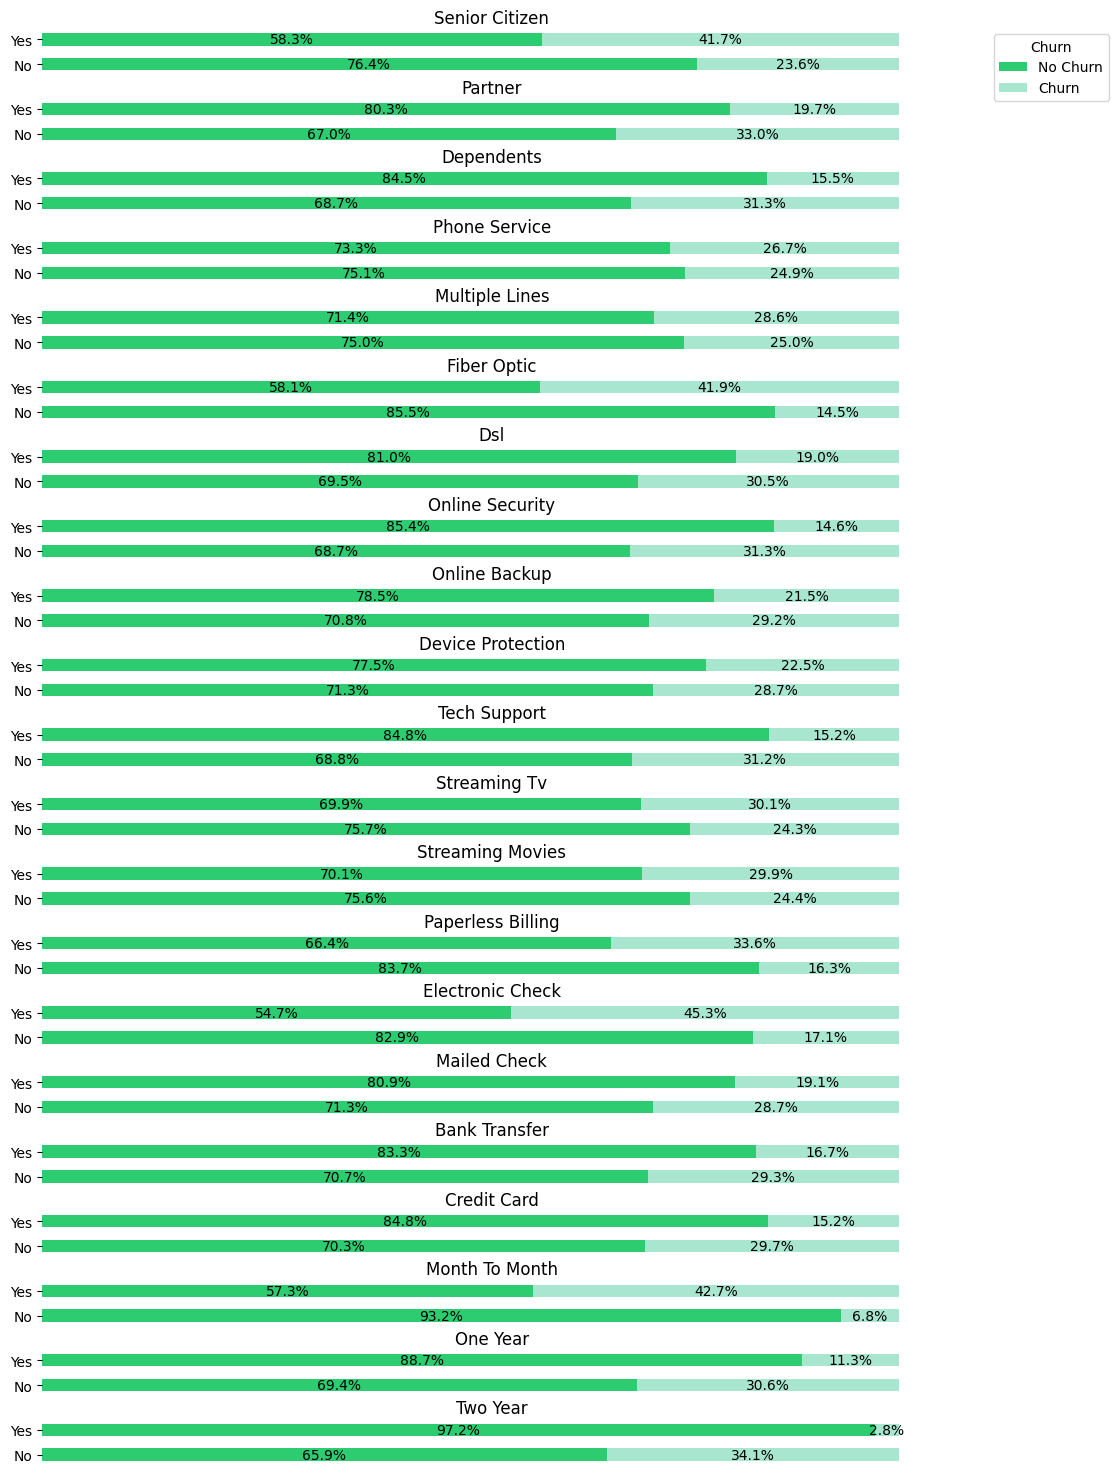

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_stacked_bar_charts(df):
    # Define groups of related binary variables
    demographics = ['senior_citizen', 'partner', 'dependents']
    services = ['phone_service', 'multiple_lines', 'fiber_optic', 'dsl']
    features = ['online_security', 'online_backup', 'device_protection', 
                'tech_support', 'streaming_tv', 'streaming_movies']
    billing = ['paperless_billing', 'electronic_check', 'mailed_check', 
               'bank_transfer', 'credit_card']
    contract = ['month_to_month', 'one_year', 'two_year']
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(12, 16))
    
    # Colors for the bars
    colors = ['#2ecc71', '#a8e6cf']  # Dark green for no churn, light green for yes churn
    
    # Counter for subplot positioning
    plot_counter = 1
    
    # Function to create percentage stacked bar chart for binary variables
    def create_stacked_bar(data, var_name, ax):
        # For binary variables, we need to calculate the churn rate when var is True vs False
        churn_rate_when_true = data[data[var_name]]['churn'].mean() * 100
        churn_rate_when_false = data[~data[var_name]]['churn'].mean() * 100
        
        # Create DataFrame for plotting
        plot_data = pd.DataFrame({
            'No Churn': [100 - churn_rate_when_false, 100 - churn_rate_when_true],
            'Churn': [churn_rate_when_false, churn_rate_when_true]
        }, index=['No', 'Yes'])
        
        # Create horizontal stacked bar chart
        plot_data.plot(kind='barh', stacked=True, ax=ax, color=colors)
        
        # Customize the chart
        ax.set_title(f'{var_name.replace("_", " ").title()}', pad=2)
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        # Position legend only on the first plot
        if plot_counter == 1:
            ax.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            ax.get_legend().remove()
        
        # Add percentage labels
        for c in ax.containers:
            ax.bar_label(c, fmt='%.1f%%', label_type='center')
        
        # Remove the frame
        for spine in ax.spines.values():
            spine.set_visible(False)
        
        # Remove x-axis ticks and labels
        ax.set_xticks([])
    
    # Function to plot a group of variables
    def plot_group(variables, group_name):
        nonlocal plot_counter
        for var in variables:
            ax = plt.subplot(len(demographics + services + features + billing + contract), 1, plot_counter)
            create_stacked_bar(df, var, ax)
            plot_counter += 1
    
    # Create plots for each group
    for group_name, group_vars in [
        ('Demographics', demographics),
        ('Services', services),
        ('Features', features),
        ('Billing', billing),
        ('Contract', contract)
    ]:
        plot_group(group_vars, group_name)
    
    # Adjust layout to be more compact
    plt.subplots_adjust(hspace=0.4, left=0.1, right=0.85, top=0.95, bottom=0.05)
    return fig

# Create the visualization
fig = create_stacked_bar_charts(df)
plt.show()

## Prepare data for logistic regression model

In [119]:
df.PaymentMethod.value_counts()

AttributeError: 'DataFrame' object has no attribute 'PaymentMethod'

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   int64  
 1   gender_male        7043 non-null   bool   
 2   senior_citizen     7043 non-null   bool   
 3   partner            7043 non-null   bool   
 4   dependents         7043 non-null   bool   
 5   phone_service      7043 non-null   bool   
 6   multiple_lines     7043 non-null   bool   
 7   single_line        7043 non-null   bool   
 8   fiber_optic        7043 non-null   bool   
 9   dsl                7043 non-null   bool   
 10  online_security    7043 non-null   bool   
 11  online_backup      7043 non-null   bool   
 12  device_protection  7043 non-null   bool   
 13  tech_support       7043 non-null   bool   
 14  streaming_tv       7043 non-null   bool   
 15  streaming_movies   7043 non-null   bool   
 16  month_to_month     7043 

In [121]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a StandardScaler instance
# scaler = StandardScaler()
scaler = MinMaxScaler()

# Select the columns to standardize
columns_to_scale = ['tenure', 'monthly_charges', 'total_charges']

# Apply scaling to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [122]:
df.head()

,tenure,gender_male,senior_citizen,partner,dependents,phone_service,multiple_lines,single_line,fiber_optic,dsl,...,one_year,two_year,paperless_billing,electronic_check,mailed_check,bank_transfer,credit_card,total_charges,monthly_charges,churn
0,0.013889,False,False,True,False,False,False,False,False,True,...,False,False,True,True,False,False,False,0.003437,0.115423,False
1,0.472222,True,False,False,False,True,False,True,False,True,...,True,False,False,False,True,False,False,0.217564,0.385075,False
2,0.027778,True,False,False,False,True,False,True,False,True,...,False,False,True,False,True,False,False,0.012453,0.354229,True
3,0.625000,True,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,0.211951,0.239303,False
4,0.027778,False,False,False,False,True,False,True,True,False,...,False,False,True,True,False,False,False,0.017462,0.521891,True


In [123]:
df.columns

Index(['tenure', 'gender_male', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'single_line', 'fiber_optic', 'dsl',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'month_to_month', 'one_year',
       'two_year', 'paperless_billing', 'electronic_check', 'mailed_check',
       'bank_transfer', 'credit_card', 'total_charges', 'monthly_charges',
       'churn'],
      dtype='object')

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define features and target variable
X = df.drop(columns=['churn'])
# X = df.drop(columns=['churn'])

y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Create and train the logistic regression model
# model = LogisticRegression(max_iter=5000)
# model = XGBClassifier(learning_rate=0.01,max_depth = 3,n_estimators = 1000)

model = RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_orig = model.predict(X_test)
y_pred = model.predict_proba(X_test)
y_pred = np.where(y_pred[:,0] < 0.70, 1, 0)

print(y_pred_orig[0:10])

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[ True False False  True False False False False False  True]
[[572 464]
 [ 23 350]]
              precision    recall  f1-score   support

       False       0.96      0.55      0.70      1036
        True       0.43      0.94      0.59       373

    accuracy                           0.65      1409
   macro avg       0.70      0.75      0.65      1409
weighted avg       0.82      0.65      0.67      1409



In [140]:
y_pred

array([[0.16398207, 0.83601793],
       [0.72986233, 0.27013767],
       [0.98031702, 0.01968298],
       ...,
       [0.93845006, 0.06154994],
       [0.96594473, 0.03405527],
       [0.32279232, 0.67720768]])